## Plan to try loading the data 

- [ ] Try loading the data using the python interpreter in a jupyter notebook
- [ ] Tried understanding the encoding of the file when we got an error
- [ ] Try asking ChatGPT 
- [ ] Try loading it in pandas
- [ ] Try re-encoding the file?
- [ ] Try command line tools to view and export the data
  - [ ] Asked chatgpt
  - [ ] Trying `jq` command line tool


^ found the issue! tried to follow the homework literally! and got stuck: ran the command `wget https://github.com/onefact/datathinking.org-codespace/blob/main/data/datathinking.zulipchat.com/raw/messages-000001.json` and got the following error:

```
parse error: Invalid numeric literal at line 8, column 10
```

Then we opened up the file to see that this was actually an HTML file! So we changed the command to `wget https://raw.githubusercontent.com/onefact/datathinking.org-codespace/main/data/datathinking.zulipchat.com/raw/messages-000001.json`


## Self-monitoring
230330 - frustration - 7

In [16]:
!wget https://github.com/onefact/datathinking.org-codespace/blob/main/data/datathinking.zulipchat.com/raw/messages-000001.json

--2023-03-30 09:58:45--  https://github.com/onefact/datathinking.org-codespace/blob/main/data/datathinking.zulipchat.com/raw/messages-000001.json
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'messages-000001.json.3'

messages-000001.jso     [ <=>                ] 142.93K  --.-KB/s    in 0.04s   

2023-03-30 09:58:46 (3.91 MB/s) - 'messages-000001.json.3' saved [146359]



In [2]:
import polars as pl
import json


In [12]:
with open("messages-000001.json", encoding="utf-8") as f:
    data = json.load(f)


JSONDecodeError: Expecting value: line 8 column 1 (char 7)

In [10]:
import chardet


In [14]:
with open("messages-000001.json", "rb") as f:
    result = chardet.detect(f.read())

print(result["encoding"])


utf-8


In [13]:
import pandas as pd

# Load the JSON file into a Pandas DataFrame
df = pd.read_json("messages-000001.json")

# Display the DataFrame
print(df.head())


ValueError: Expected object or value

## After deciding NOT to follow the homework instructions literally
* also learned that `wget` does NOT overwrite files (that was an assumption i seem to have made)

In [20]:
!rm messages-000001.json*

!wget https://raw.githubusercontent.com/onefact/datathinking.org-codespace/main/data/datathinking.zulipchat.com/raw/messages-000001.json

--2023-03-30 10:01:24--  https://raw.githubusercontent.com/onefact/datathinking.org-codespace/main/data/datathinking.zulipchat.com/raw/messages-000001.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2934074 (2.8M) [text/plain]
Saving to: 'messages-000001.json'

messages-000001.jso 100%[===================>]   2.80M  --.-KB/s    in 0.07s   

2023-03-30 10:01:25 (38.4 MB/s) - 'messages-000001.json' saved [2934074/2934074]



In [21]:
!head messages-000001.json

{
  "zerver_message": [
    {
      "id": 299488052,
      "sender": 100007,
      "recipient": 924073,
      "realm": 47304,
      "subject": "topic demonstration",
      "content": "This is a message on stream #**general** with the topic `topic demonstration`.",
      "rendered_content": "<p>This is a message on stream <a class=\"stream\" data-stream-id=\"345278\" href=\"/#narrow/stream/345278-general\">#general</a> with the topic <code>topic demonstration</code>.</p>",


In [22]:
import polars as pl
import json


In [23]:
with open("messages-000001.json", "r") as f:
    data = json.load(f)


In [24]:
data


{'zerver_message': [{'id': 299488052,
   'sender': 100007,
   'recipient': 924073,
   'realm': 47304,
   'subject': 'topic demonstration',
   'content': 'This is a message on stream #**general** with the topic `topic demonstration`.',
   'rendered_content': '<p>This is a message on stream <a class="stream" data-stream-id="345278" href="/#narrow/stream/345278-general">#general</a> with the topic <code>topic demonstration</code>.</p>',
   'rendered_content_version': 1,
   'date_sent': 1663549367.691131,
   'sending_client': 1002,
   'last_edit_time': None,
   'edit_history': None,
   'has_attachment': False,
   'has_image': False,
   'has_link': True,
   'search_tsvector': "'demonstrate':2,14 'demonstration':2,14 'general':9 'message':6 'stream':8 'topic':1,12,13"},
  {'id': 299488053,
   'sender': 100007,
   'recipient': 924073,
   'realm': 47304,
   'subject': 'topic demonstration',
   'content': 'Topics are a lightweight tool to keep conversations organized. You can learn more about t

In [26]:
import polars as pl
import json

# Load the JSON data into a list of dictionaries
with open("messages-000001.json") as f:
    data = json.load(f)


In [27]:
# Convert the list of dictionaries to a Polars DataFrame
df = pl.from_dict(data)


ShapeError: could not create a new dataframe: series "zerver_message" has length 240 while series "zerver_usermessage" has length 20330

In [ ]:
# Compute summary statistics of the dataset
summary = df.describe()

# Display the summary statistics
print(summary)


## From Indrek

* copy and pasted indrek's answer from the chat
* it looks like it works! 
* does not *feel* satisfying though
* that's okay! we can move on!

In [33]:
import pandas as pd
import polars as pl

# Load the JSON file into a pandas dataframe
with open("messages-000001.json", "r") as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the pandas dataframe to a Polars dataframe
pl_df = pl.from_pandas(df)

# Get summary statistics
summary = pl_df.describe()
print(summary)


shape: (7, 3)
┌────────────┬────────────────┬────────────────────┐
│ describe   ┆ zerver_message ┆ zerver_usermessage │
│ ---        ┆ ---            ┆ ---                │
│ str        ┆ str            ┆ str                │
╞════════════╪════════════════╪════════════════════╡
│ count      ┆ 1              ┆ 1                  │
│ null_count ┆ 0              ┆ 0                  │
│ mean       ┆ null           ┆ null               │
│ std        ┆ null           ┆ null               │
│ min        ┆ null           ┆ null               │
│ max        ┆ null           ┆ null               │
│ median     ┆ null           ┆ null               │
└────────────┴────────────────┴────────────────────┘


## Is it okay to stop here and accept the answer? 

Yes!

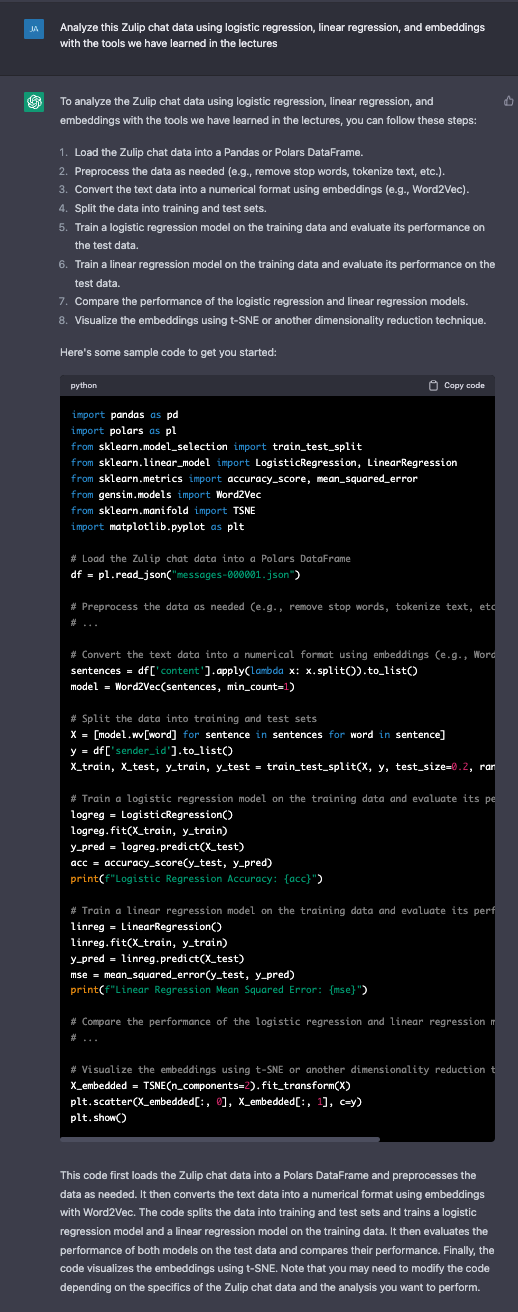

In [32]:
import pandas as pd
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the Zulip chat data into a Polars DataFrame
df = pl.read_json("messages-000001.json")

# Preprocess the data as needed (e.g., remove stop words, tokenize text, etc.)
# ...

# Convert the text data into a numerical format using embeddings (e.g., Word2Vec)
sentences = df["content"].apply(lambda x: x.split()).to_list()
model = Word2Vec(sentences, min_count=1)

# Split the data into training and test sets
X = [model.wv[word] for sentence in sentences for word in sentence]
y = df["sender_id"].to_list()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a logistic regression model on the training data and evaluate its performance on the test data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {acc}")

# Train a linear regression model on the training data and evaluate its performance on the test data
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")

# Compare the performance of the logistic regression and linear regression models
# ...

# Visualize the embeddings using t-SNE or another dimensionality reduction technique
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.show()


RuntimeError: BindingsError: "Not yet implemented: read an Array from a non-Array JSON"

In [34]:
import pandas as pd
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the Zulip chat data into a Polars DataFrame
# Load the JSON file into a pandas dataframe
with open("messages-000001.json", "r") as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the pandas dataframe to a Polars dataframe
pl_df = pl.from_pandas(df)

# Preprocess the data as needed (e.g., remove stop words, tokenize text, etc.)
# ...

# Convert the text data into a numerical format using embeddings (e.g., Word2Vec)
sentences = df["content"].apply(lambda x: x.split()).to_list()
model = Word2Vec(sentences, min_count=1)

# Split the data into training and test sets
X = [model.wv[word] for sentence in sentences for word in sentence]
y = df["sender_id"].to_list()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a logistic regression model on the training data and evaluate its performance on the test data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {acc}")

# Train a linear regression model on the training data and evaluate its performance on the test data
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")

# Compare the performance of the logistic regression and linear regression models
# ...

# Visualize the embeddings using t-SNE or another dimensionality reduction technique
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.show()


KeyError: 'content'

In [38]:
df["zerver_message"].head()


0    [{'id': 299488052, 'sender': 100007, 'recipien...
Name: zerver_message, dtype: object

In [37]:
import pandas as pd
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the Zulip chat data into a Polars DataFrame
# Load the JSON file into a pandas dataframe
with open("messages-000001.json", "r") as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the pandas dataframe to a Polars dataframe
pl_df = pl.from_pandas(df)

# Preprocess the data as needed (e.g., remove stop words, tokenize text, etc.)
# ...

# Convert the text data into a numerical format using embeddings (e.g., Word2Vec)
sentences = df["content"].apply(lambda x: x.split()).to_list()
model = Word2Vec(sentences, min_count=1)

# Split the data into training and test sets
X = [model.wv[word] for sentence in sentences for word in sentence]
y = df["sender_id"].to_list()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a logistic regression model on the training data and evaluate its performance on the test data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {acc}")

# Train a linear regression model on the training data and evaluate its performance on the test data
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")

# Compare the performance of the logistic regression and linear regression models
# ...

# Visualize the embeddings using t-SNE or another dimensionality reduction technique
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.show()


AttributeError: 'list' object has no attribute 'split'

## Interim goal: try to find message content and look at it

In [44]:
# Load the JSON file into a pandas dataframe
with open("messages-000001.json", "r") as f:
    data = json.load(f)
# df = pd.json_normalize(data)


this is the first message in the dataset:

In [47]:
data["zerver_message"][0]


{'id': 299488052,
 'sender': 100007,
 'recipient': 924073,
 'realm': 47304,
 'subject': 'topic demonstration',
 'content': 'This is a message on stream #**general** with the topic `topic demonstration`.',
 'rendered_content': '<p>This is a message on stream <a class="stream" data-stream-id="345278" href="/#narrow/stream/345278-general">#general</a> with the topic <code>topic demonstration</code>.</p>',
 'rendered_content_version': 1,
 'date_sent': 1663549367.691131,
 'sending_client': 1002,
 'last_edit_time': None,
 'edit_history': None,
 'has_attachment': False,
 'has_image': False,
 'has_link': True,
 'search_tsvector': "'demonstrate':2,14 'demonstration':2,14 'general':9 'message':6 'stream':8 'topic':1,12,13"}

next! can we find more than one message? 

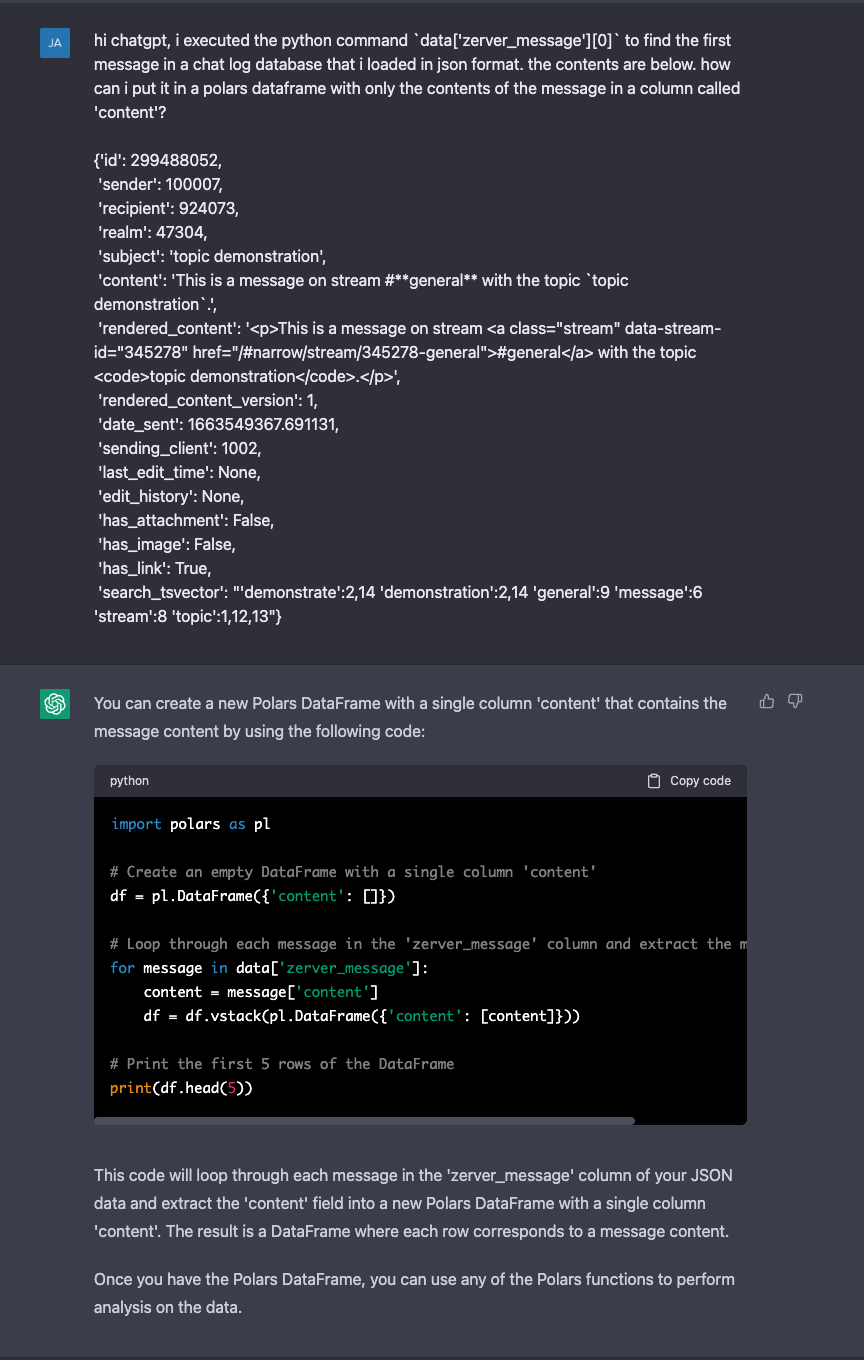

In [49]:
import polars as pl

# Create an empty DataFrame with a single column 'content'
df = pl.DataFrame({"content": []})

# Loop through each message in the 'zerver_message' column and extract the message content
for message in data["zerver_message"]:
    content = str(message["content"])
    df = df.vstack(pl.DataFrame({"content": [content]}))

# Print the first 5 rows of the DataFrame
print(df.head(5))


ShapeError: unable to vstack, dtypes for column "content" don't match: `f32` and `str`

In [53]:
import polars as pl

all_messages = []
# Loop through each message in the 'zerver_message' column and extract the message content
for message in data["zerver_message"]:
    content = message["content"]
    all_messages.append(content)


In [54]:
all_messages


['This is a message on stream #**general** with the topic `topic demonstration`.',
 'Topics are a lightweight tool to keep conversations organized. You can learn more about topics at [Streams and topics](/help/streams-and-topics).',
 "This is a message on stream #**general** with the topic `swimming turtles`.\n\n[](/static/images/cute/turtle.png)\n\n[Start a new topic](/help/start-a-new-topic) any time you're not replying to a         previous message.",
 'Hi! I am Jaan. I am teaching this course and through the data thinking principles we will learn together I hope to help people feel more self-efficacy and agency in an era where much of the forces that shape our behavior, information consumption, political decisions, financial decisions and resources are hidden in closed-source artificial intelligence technology.',
 'Hello Jaan,\nI am Nesma, a Ph.D. student at the University of Tartu.\nI understood from the description in OIS that the course will not focus on specific methods, but th

In [57]:
import polars as pl

# Load json file
with open("messages-000001.json", "r") as f:
    data = json.load(f)

# Create a dictionary with column names and values
data = {"content": all_messages}

# Create a Polars DataFrame
df = pl.DataFrame(data)


In [58]:
df.describe()


describe,content
str,str
"""count""","""240"""
"""null_count""","""0"""
"""mean""",null
"""std""",null
"""min""","""(Windows subsy…"
"""max""","""yay!! amazing,…"
"""median""",null


In [51]:
import polars as pl

# Create an empty DataFrame with a single string column 'content'
df = pl.DataFrame({"content": pl.Series([], dtype=pl.Str)})


AttributeError: module 'polars' has no attribute 'Str'

In [42]:
df.loc[0]


zerver_message        [{'id': 299488052, 'sender': 100007, 'recipien...
zerver_usermessage    [{'id': 8257034355, 'user_profile': 544719, 'm...
Name: 0, dtype: object

In [43]:
df.loc[0]["zerver_message"]


[{'id': 299488052,
  'sender': 100007,
  'recipient': 924073,
  'realm': 47304,
  'subject': 'topic demonstration',
  'content': 'This is a message on stream #**general** with the topic `topic demonstration`.',
  'rendered_content': '<p>This is a message on stream <a class="stream" data-stream-id="345278" href="/#narrow/stream/345278-general">#general</a> with the topic <code>topic demonstration</code>.</p>',
  'rendered_content_version': 1,
  'date_sent': 1663549367.691131,
  'sending_client': 1002,
  'last_edit_time': None,
  'edit_history': None,
  'has_attachment': False,
  'has_image': False,
  'has_link': True,
  'search_tsvector': "'demonstrate':2,14 'demonstration':2,14 'general':9 'message':6 'stream':8 'topic':1,12,13"},
 {'id': 299488053,
  'sender': 100007,
  'recipient': 924073,
  'realm': 47304,
  'subject': 'topic demonstration',
  'content': 'Topics are a lightweight tool to keep conversations organized. You can learn more about topics at [Streams and topics](/help/stre

In [63]:
# Load json file
with open("messages-000001.json", "r") as f:
    data = json.load(f)

all_messages = []
all_senders = []
# Loop through each message in the 'zerver_message' column and extract the message content
for message in data["zerver_message"]:
    content = message["content"]
    sender = message["sender"]
    all_messages.append(content)
    all_senders.append(sender)

# Create a dictionary with column names and values
data = {"content": all_messages, "sender_id": all_senders}

# Create a Polars DataFrame
df = pl.DataFrame(data)


In [64]:
df.describe()


describe,content,sender_id
str,str,f64
"""count""","""240""",240.0
"""null_count""","""0""",0.0
"""mean""",null,570311.083333
"""std""",null,57198.243882
"""min""","""(Windows subsy…",100007.0
"""max""","""yay!! amazing,…",596357.0
"""median""",null,589761.0


In [61]:
import pandas as pd
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load json file
with open("messages-000001.json", "r") as f:
    data = json.load(f)

all_messages = []
all_senders = []
# Loop through each message in the 'zerver_message' column and extract the message content
for message in data["zerver_message"]:
    content = message["content"]
    sender = message["sender"]
    all_messages.append(content)
    all_senders.append(sender)

# Create a dictionary with column names and values
data = {"content": all_messages, "sender_id": all_senders}

# Create a Polars DataFrame
df = pl.DataFrame(data)

# Preprocess the data as needed (e.g., remove stop words, tokenize text, etc.)
# ...

# Convert the text data into a numerical format using embeddings (e.g., Word2Vec)
sentences = df["content"].apply(lambda x: x.split()).to_list()
model = Word2Vec(sentences, min_count=1)

# Split the data into training and test sets
X = [model.wv[word] for sentence in sentences for word in sentence]
y = df["sender_id"].to_list()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a logistic regression model on the training data and evaluate its performance on the test data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {acc}")

# Train a linear regression model on the training data and evaluate its performance on the test data
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")

# Compare the performance of the logistic regression and linear regression models
# ...

# Visualize the embeddings using t-SNE or another dimensionality reduction technique
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [13575, 240]

In [68]:
len(X), len(y)


(13575, 240)

## ChatGPT is trying to have us train a model where X is the message content and Y is sender

But, the size of X and Y are different! One is 13575 and the other is 240.

The size of `X` is determined by the number of words in every message in the dataset. The size of `Y` is determined by the number of senders in the dataset. 

It makes sense that these are different.

The code for creating `X` is:
```
X = [model.wv[word] for sentence in sentences for word in sentence]
```

Ask: Maybe if we change this in the right way we can find a way to make X the same size as Y?


In [69]:
len(sentences)


240

Maybe we can just use the first word in the sentence as the X value? 

```
X = [model.wv[sentence[0]] for sentence in sentences]
```
Thanks Copilot!
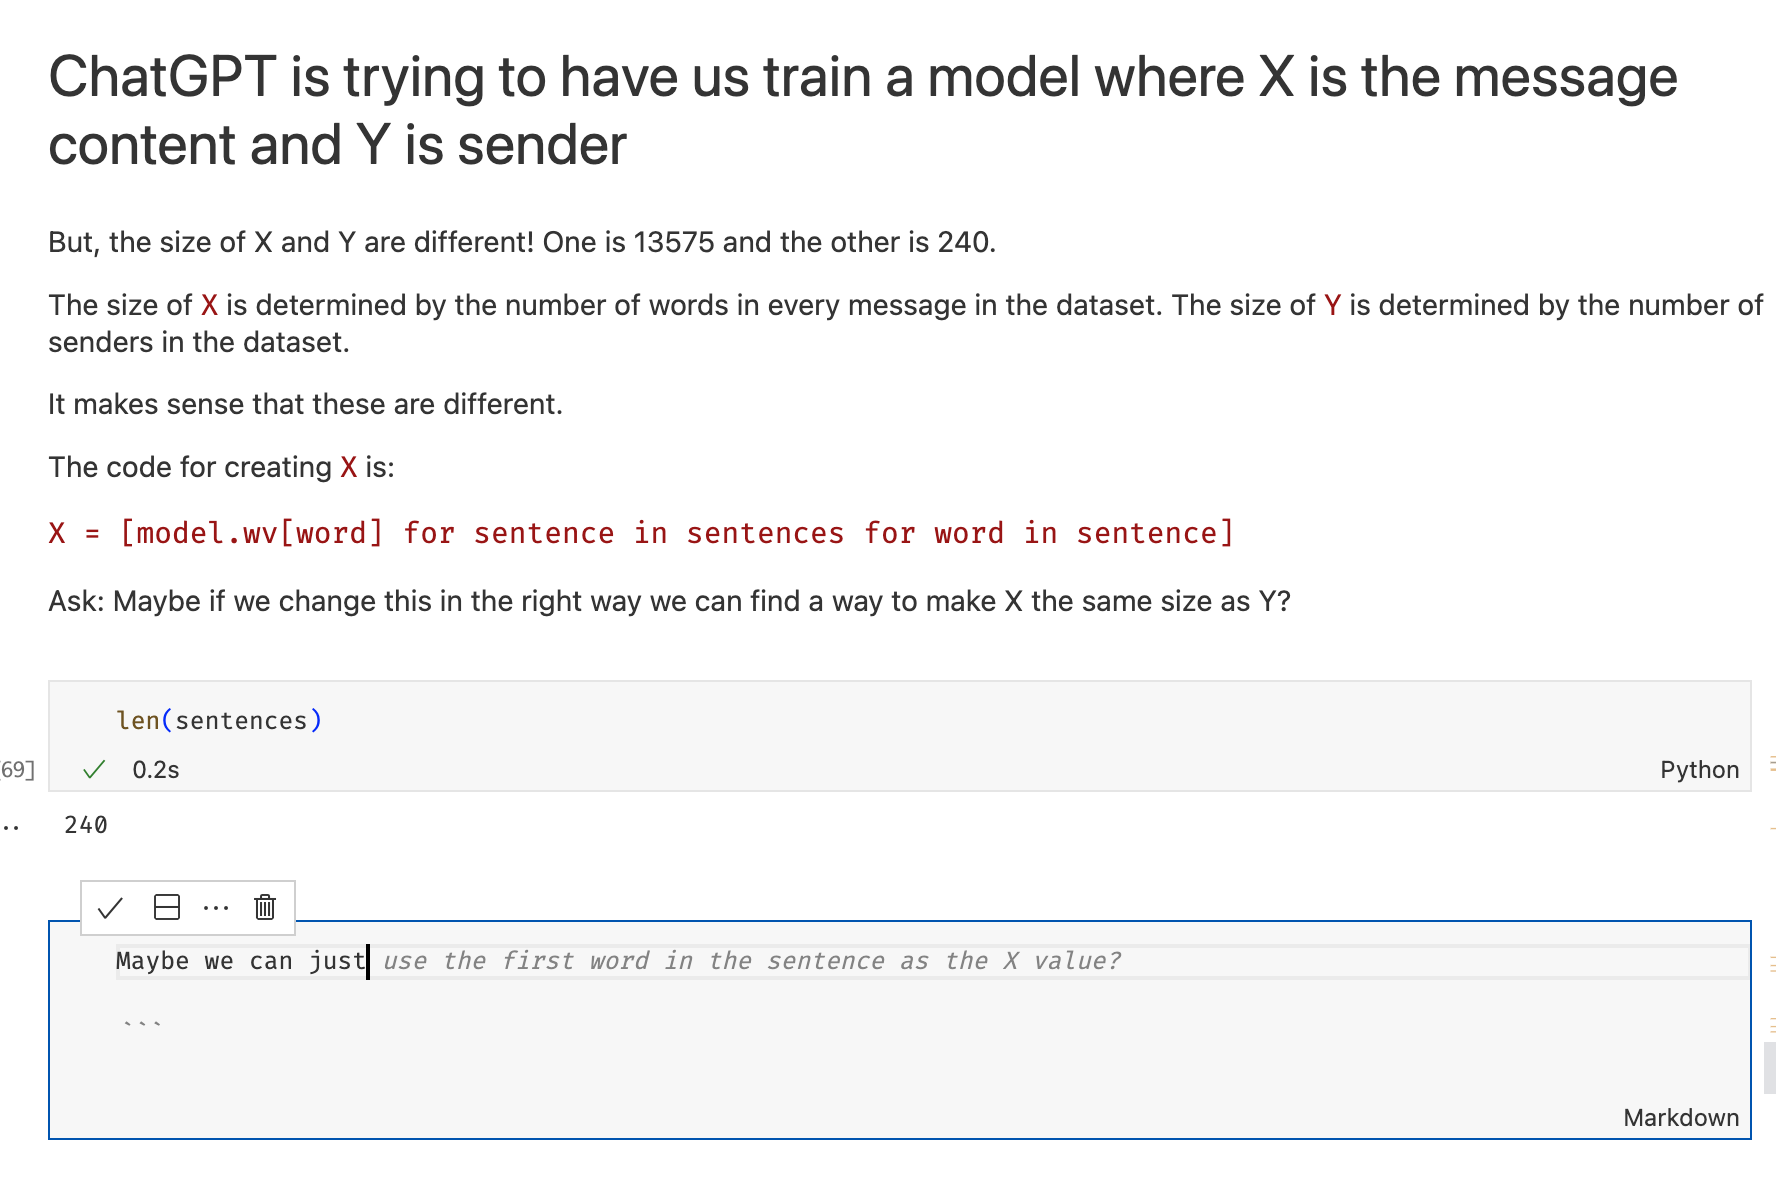
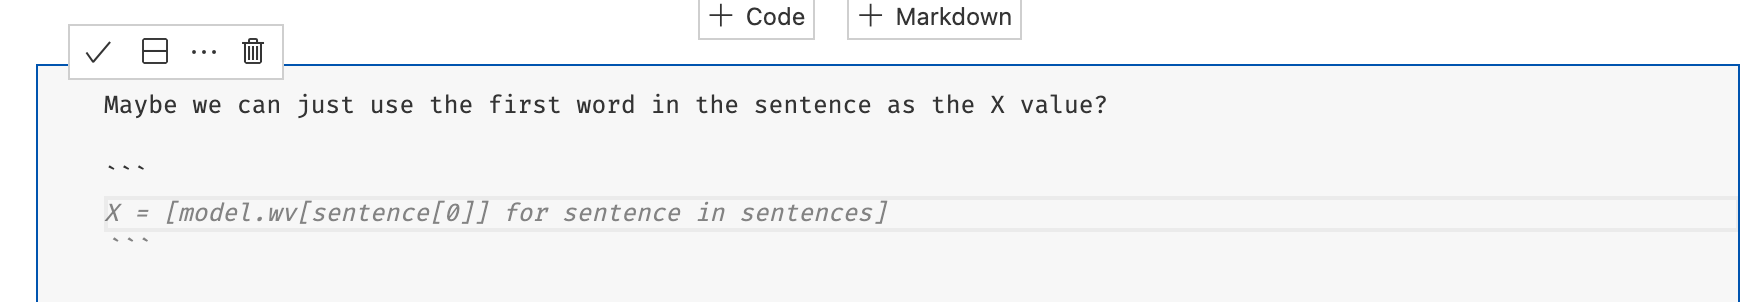


In [70]:
X = [model.wv[sentence[0]] for sentence in sentences]


In [71]:
len(X)


240

## Now we made X the same size as Y, let's try again!

In [74]:
import pandas as pd
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load json file
with open("messages-000001.json", "r") as f:
    data = json.load(f)

all_messages = []
all_senders = []
# Loop through each message in the 'zerver_message' column and extract the message content
for message in data["zerver_message"]:
    content = message["content"]
    sender = message["sender"]
    all_messages.append(content)
    all_senders.append(sender)

# Create a dictionary with column names and values
data = {"content": all_messages, "sender_id": all_senders}

# Create a Polars DataFrame
df = pl.DataFrame(data)

# Preprocess the data as needed (e.g., remove stop words, tokenize text, etc.)
# ...

# Convert the text data into a numerical format using embeddings (e.g., Word2Vec)
sentences = df["content"].apply(lambda x: x.split()).to_list()
model = Word2Vec(sentences, min_count=1)

# Make a list of the embeddings for the first word in each message
X = [model.wv[sentence[0]] for sentence in sentences]

# Split the data into training and test sets
y = df["sender_id"].to_list()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a logistic regression model on the training data and evaluate its performance on the test data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {acc}")

# Train a linear regression model on the training data and evaluate its performance on the test data
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")

# Compare the performance of the logistic regression and linear regression models
# ...

# Visualize the embeddings using t-SNE or another dimensionality reduction technique
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.show()


Logistic Regression Accuracy: 0.3125
Linear Regression Mean Squared Error: 46066827992.76548


AttributeError: 'list' object has no attribute 'shape'

Logistic Regression Accuracy: 0.3333333333333333
Linear Regression Mean Squared Error: 49541409165.6864


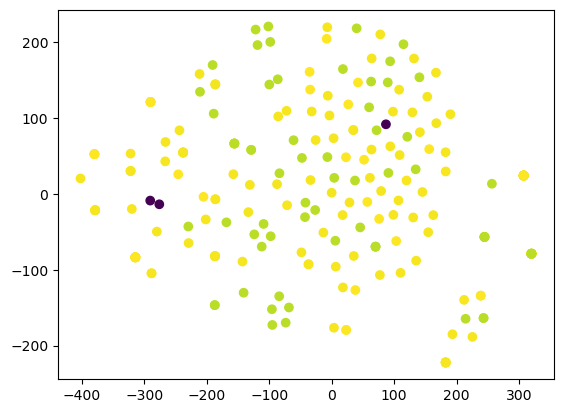

In [75]:
import numpy as np
import pandas as pd
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load json file
with open("messages-000001.json", "r") as f:
    data = json.load(f)

all_messages = []
all_senders = []
# Loop through each message in the 'zerver_message' column and extract the message content
for message in data["zerver_message"]:
    content = message["content"]
    sender = message["sender"]
    all_messages.append(content)
    all_senders.append(sender)

# Create a dictionary with column names and values
data = {"content": all_messages, "sender_id": all_senders}

# Create a Polars DataFrame
df = pl.DataFrame(data)

# Preprocess the data as needed (e.g., remove stop words, tokenize text, etc.)
# ...

# Convert the text data into a numerical format using embeddings (e.g., Word2Vec)
sentences = df["content"].apply(lambda x: x.split()).to_list()
model = Word2Vec(sentences, min_count=1)

# Make a list of the embeddings for the first word in each message
X = [model.wv[sentence[0]] for sentence in sentences]

# Split the data into training and test sets
y = df["sender_id"].to_list()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a logistic regression model on the training data and evaluate its performance on the test data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {acc}")

# Train a linear regression model on the training data and evaluate its performance on the test data
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")

# Compare the performance of the logistic regression and linear regression models
# ...

# Convert X to a numpy array
X = np.array(X)

# Visualize the embeddings using t-SNE or another dimensionality reduction technique
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.show()
